In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling

path = r"/Users/kevin.reilly/Library/CloudStorage/OneDrive-TheTradeDesk/repos/baseballdatabank/core/batting.csv"
# 'r' is used to elminate the whitespace in the path.

df = pd.read_csv(path)
df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


# Batting Average

OPS = OBP + SLG

OBP = (H + BB + HBP) / (AB + BB + HBP + SF)
SLG = (1B + 2*2B + 3*3B + 4*HR) / AB

In [3]:
# Filter for Year and Minimum ABs
# AB > 130 is the definition of post-rookie 
# yearID > 1901 is the modern era

df = df[(df.AB >= 130) & (df.yearID >= 1901)]

# Add Batting Average (BA) to the dataframe
df['BA'] = round((df['H'] / df['AB']), 3)

# Add Singles (1B) to the dataframe
df['1B'] = df['H'] - df['2B'] - df['3B'] - df['HR']

# Add On Base Percentage (OBP) to the dataframe
df['OBP'] = round(((df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF'])),3)

# Add Slugging Percentage (SLG) to the dataframe
df['SLG'] = round(((df['1B'] + (2 * df['2B']) + (3 * df['3B']) + (4 * df['HR'])) / df['AB']), 3)

# Add Onbase Plus Slugging (OPS) to the dataframe
df['OPS'] = df['OBP'] + df['SLG']

stat_summary = df[['BA', 'SLG', 'OBP', 'OPS']].describe()
print(stat_summary)

                 BA           SLG           OBP           OPS
count  30512.000000  30512.000000  20447.000000  20447.000000
mean       0.264751      0.392586      0.328868      0.730460
std        0.035890      0.080560      0.040258      0.109939
min        0.092000      0.092000      0.172000      0.357000
25%        0.241000      0.336000      0.302000      0.655000
50%        0.265000      0.387000      0.328000      0.726000
75%        0.288000      0.443000      0.355000      0.800000
max        0.426000      0.863000      0.609000      1.421000


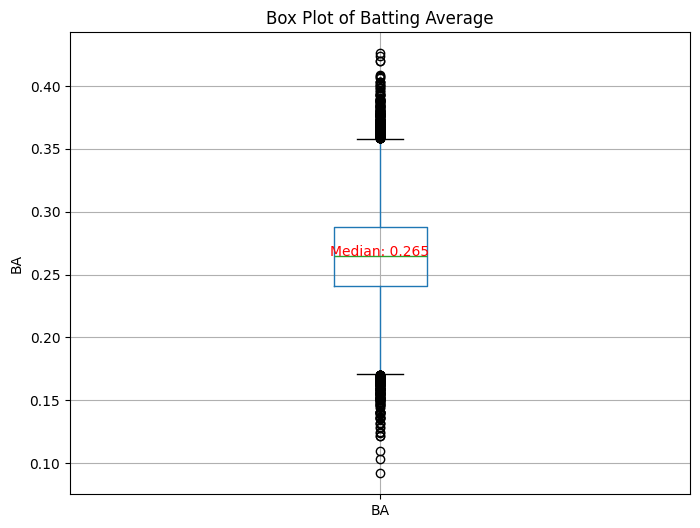

In [ ]:
# Create a box plot to visualize min, max, quartiles, and outliers
plt.figure(figsize=(8,6))
df.boxplot(column='BA')

# Adding title and labels
plt.title('Box Plot of Batting Average')
plt.ylabel('BA')
# Calculate the median value

mean_value = df['BA'].mean()

# Annotate the median value on the plot
plt.text(1, median_value, f'Mean: {median_value:.3f}', horizontalalignment='center', color='red')


plt.show()